In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
warnings.filterwarnings("ignore")

In [3]:
def dotplot(data, figsize, title, s=100, int_axis=True):
  x = []
  y = []

  for entry in set(data):
    count = data.count(entry)
    for i in range(1, count + 1):
      x.append(entry)
      y.append(i)

  df = pd.DataFrame({
    "x": x,
    "y": y,
  })

  fig = plt.figure(figsize=figsize)
  ax = sns.scatterplot(data=df, x="x", y="y", s=s, edgecolor="k", facecolor="none")
  
  ax.set_xlabel("")
  ax.get_yaxis().set_visible(False)
  ax.set_ylim([min(y) - 1, max(y) + 1])
  ax.set_title(title)
  if int_axis:
    ax.get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
  
  plt.show()

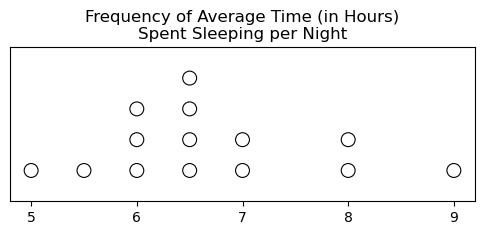

In [4]:
data = [5, 5.5, 6, 6, 6, 6.5, 6.5, 6.5, 6.5, 7, 7, 8, 8, 9]
title = "Frequency of Average Time (in Hours)\nSpent Sleeping per Night"

dotplot(data, figsize=(6, 2), title=title, s=100, int_axis=True)

**Does your dot plot look the same as or different from the example? Why? If you did the same example in an English class with the same number of students, do you think the results would be the same? Why or why not?**

Yes, my dot plot looks the same as the example since I did not conduct my own experiment, instead I used the same values as given in the example. But, if I did the experiment in an English class, I would most likely get slightly different results, because different students have different sleeping schedules.

**Where do your data appear to cluster? How might you interpret the clustering?**

The data appear to cluster in the 6 to 7 hours range, peaking at 6.5 hours. This shows that most students sleep for 6 to 7 hours.

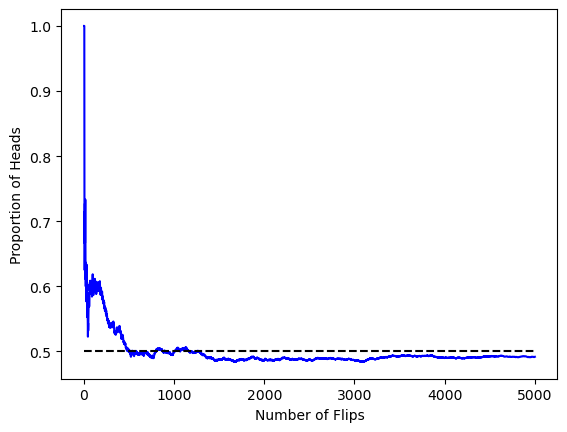

In [5]:
def toss_coin(n):
    n_heads = 0
    n_tails = 0
    proportions = []
    flips = []

    for i in range(1, n + 1):
        toss = np.random.choice([0, 1])
        if toss == 0:
            n_heads += 1
        else:
            n_tails += 1
        proportion = n_heads / i

        proportions.append(proportion)
        flips.append(i)
  
    df = pd.DataFrame({
        "proportions": proportions,
        "flips": flips,
    })

    ax = sns.lineplot(data=df, x="flips", y="proportions", color="blue")
    ax.hlines(y=0.5, xmin=0, xmax=n, colors="k", linestyles="--")
    ax.set_xlabel("Number of Flips")
    ax.set_ylabel("Proportion of Heads")
    plt.show()

toss_coin(n=5000)

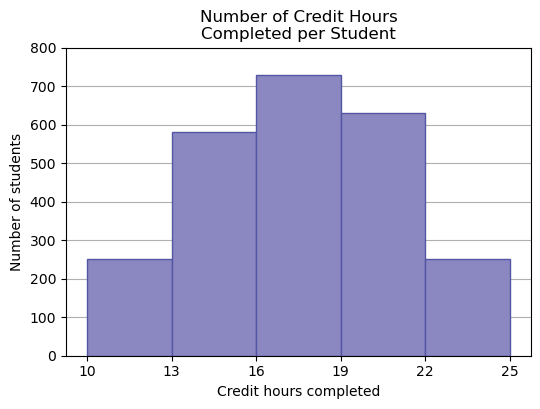

In [6]:
class_boundaries = [10, 13, 16, 19, 22, 25]
frequencies = [250, 580, 730, 630, 250]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.bar(class_boundaries[:-1], frequencies, width=np.diff(class_boundaries), align="edge", color="#8b87c1", edgecolor="#5355a5")

ax.set_axisbelow(True)
ax.grid(axis="y")
ax.set_xticks(class_boundaries)
ax.set_ylim([0, 800])
ax.set_xlabel("Credit hours completed")
ax.set_ylabel("Number of students")
ax.set_title("Number of Credit Hours\nCompleted per Student")

plt.savefig("data/1-4.png")
plt.show()

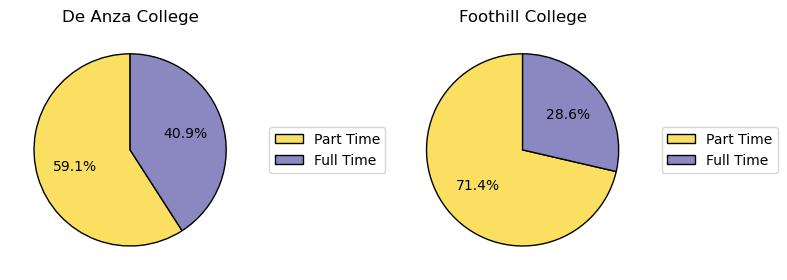

In [7]:
deanza_df = pd.DataFrame(
    {
        "Category": ["Part Time", "Full Time"],
        "Number": [13296, 9200],
        "Percent": [59.1, 40.9],
        "College": "De Anza",
    }
)

foothill_df = pd.DataFrame(
    {
        "Category": ["Part Time", "Full Time"],
        "Number": [10124, 4059],
        "Percent": [71.4, 28.6],
        "College": "Foothill",
    }
)

colors = ["#fbdf61","#8b88c1"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
wedges1, texts1, autotexts1 = ax1.pie(deanza_df["Number"], autopct="%2.1f%%", startangle=90, colors=colors, wedgeprops=dict(edgecolor="k"))
wedges2, texts2, autotexts2 = ax2.pie(foothill_df["Number"], autopct="%2.1f%%", startangle=90, colors=colors, wedgeprops=dict(edgecolor="k"))

ax1.legend(wedges1, deanza_df["Category"], loc="center left", bbox_to_anchor=(1.05, 0.5))
ax2.legend(wedges2, foothill_df["Category"], loc="center left", bbox_to_anchor=(1.05, 0.5))

ax1.set_title("De Anza College")
ax2.set_title("Foothill College")

plt.tight_layout()
plt.show()

In [3]:
scores = np.array([
  5, 7, 10, 9, 8, 3,
  10, 5, 9, 8, 7, 6,
  9, 10, 8, 6, 7, 9,
  9, 10, 10, 9, 8, 9,
  7, 8, 9, 5, 7, 4,
  9, 9, 9, 10, 8, 7,
  7, 7, 10, 9, 8, 8,
  8, 8, 9, 10, 8, 8,
  9, 7, 8, 7, 7, 8,
  8, 8, 10, 9, 8, 7
])

categories = np.array([
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6,
  1, 2, 3, 4, 5, 6
])

## Stratified Sampling

In [6]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=18, random_state=42)
for sample_index, nonsample_index in sss.split(scores, categories):
    sample, sample_categories = scores[sample_index], categories[sample_index]

print(sample)

population_strata_distribution = np.array([
  (categories == 1).sum() / len(categories),
  (categories == 2).sum() / len(categories),
  (categories == 3).sum() / len(categories),
  (categories == 4).sum() / len(categories),
  (categories == 5).sum() / len(categories),
  (categories == 6).sum() / len(categories),
])

sample_strata_distribution = np.array([
  (sample_categories == 1).sum() / len(sample_categories),
  (sample_categories == 2).sum() / len(sample_categories),
  (sample_categories == 3).sum() / len(sample_categories),
  (sample_categories == 4).sum() / len(sample_categories),
  (sample_categories == 5).sum() / len(sample_categories),
  (sample_categories == 6).sum() / len(sample_categories),
])

df = pd.DataFrame({
    "Population": population_strata_distribution,
    "Sample": sample_strata_distribution
})
df["Strata"] = np.array([1, 2, 3, 4, 5, 6])
df = df.set_index("Strata")
df.head()

[ 7  8  7  5  7 10  9  8  9  9  8  8 10  7  9  7 10 10]


,Population,Sample
Strata,,
1,0.166667,0.166667
2,0.166667,0.166667
3,0.166667,0.166667
4,0.166667,0.166667
5,0.166667,0.166667


## Cluster Sampling

In [7]:
clusters = np.random.choice([1, 2, 3, 4, 5, 6], size=2, replace=False)
indices = np.isin(categories, clusters)
sample = scores[indices]

print(f"Clusters: {clusters}, Sample size: {len(sample)}")
print(sample)

Clusters: [2 3], Sample size: 20
[ 7 10  5  9 10  8 10 10  8  9  9  9  7 10  8  9  7  8  8 10]


## Random Sampling Without Replacement

In [8]:
sample = np.random.choice(scores, size=15, replace=False)
print(sample)

[ 9  9  8  9  7  5  9  8  7  7  4  8  5 10  8]


## Systematic Sampling

In [9]:
sample = scores[:60]
print(sample)

[ 5  7 10  9  8  3 10  5  9  8  7  6  9 10  8  6  7  9  9 10 10  9  8  9
  7  8  9  5  7  4  9  9  9 10  8  7  7  7 10  9  8  8  8  8  9 10  8  8
  9  7  8  7  7  8  8  8 10  9  8  7]
